# SMS SPAM dectection  

In [370]:
import numpy as np
import pandas as pd
df=pd.read_csv("spam.csv")

In [371]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [372]:
df.dtypes
#All colums are objects

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

## DATA cleaning


In [373]:
print(df.info())
print(df.isnull().sum())#for checking the data and getting info realted to different colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


### Droping Last three colums (allmost all values are NAN)

In [374]:

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

### Renaming the colums

In [375]:

df.rename(columns={"v1":"class","v2":"sms_text"},inplace=True)
df

,class,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Encoding the class into numberic values

In [376]:
from sklearn.preprocessing import LabelEncoder  #to change class value into num
sms_encdor=LabelEncoder()


In [377]:
df["class"]=sms_encdor.fit_transform(df["class"])

### Checking any duplicates

In [378]:
df.duplicated().sum() 

403

In [379]:
#403 duplicates removed or droped from main data set

df=df.drop_duplicates(keep="first")
df.duplicated().sum() # now no duplicates values
df

,class,sms_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA 

In [380]:
df.head() #Data is ready for analyis 

,class,sms_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Data  distribution

In [381]:

df['class'].value_counts() #data set is having approx 12.6 percent spam sms
#data is imbalnace

0    4516
1     653
Name: class, dtype: int64

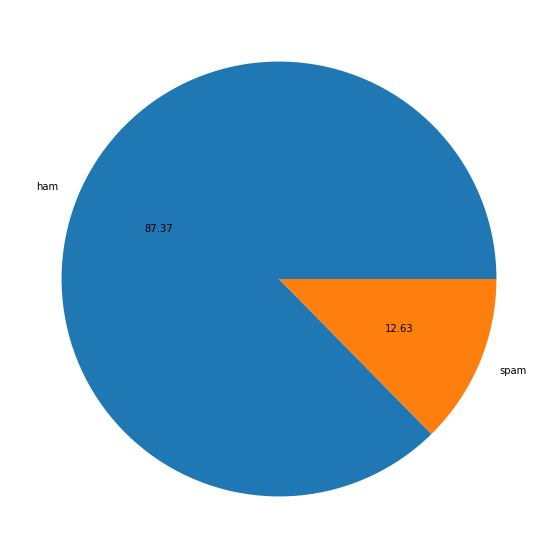

In [382]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.pie(df['class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Refining and breaking the SMS text for futhur analysis by usning Natural Lang. Toolkit 

In [383]:
import nltk  #

In [384]:
#nltk.download('punkt')

In [385]:
df['Number_char']=df['sms_text'].apply(len)  #numebr of char in sms text
df['Number_words']=df['sms_text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words in a sms 
df['Number_sentences']=df['sms_text'].apply(lambda x:len(nltk.sent_tokenize(x))) # number of sentences in a sms

<ipython-input-385-f07a9ddddce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_char']=df['sms_text'].apply(len)  #numebr of char in sms text
<ipython-input-385-f07a9ddddce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_words']=df['sms_text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words in a sms
<ipython-input-385-f07a9ddddce2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

## Describing the Ham Sms

In [386]:
df[df['class']==0][['Number_char','Number_words','Number_sentences']].describe()  #discrption of ham sms

,Number_char,Number_words,Number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Describing the Spam Sms

In [387]:
df[df['class']==1][['Number_char','Number_words','Number_sentences']].describe()   #discrption of spam sms

,Number_char,Number_words,Number_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


## Number_char

<AxesSubplot:xlabel='Number_char', ylabel='Count'>

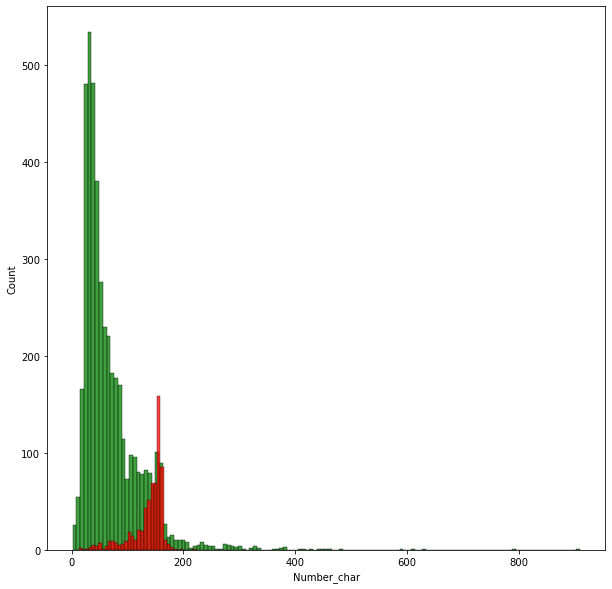

In [388]:
#plotting histogram
import seaborn as sns

plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]['Number_char'],color="green")
sns.histplot(df[df['class']==1]['Number_char'],color='red')

#this show a trend that number of char are bit higher side  for span sms as compared to ham sms 

<Figure size 720x720 with 0 Axes>

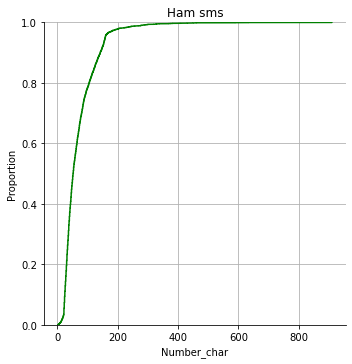

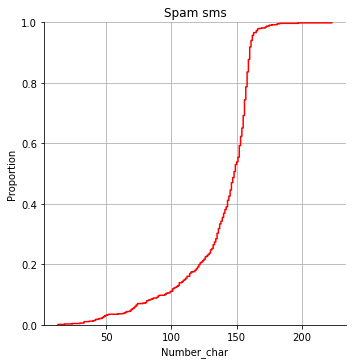

In [419]:

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]['Number_char'],color="green",kind='ecdf')
plt.title("Ham sms")
plt.grid()
sns.displot(df[df['class']==1]['Number_char'],color='red',kind="ecdf")
plt.title("Spam sms")
plt.grid()

## Number_words

Text(0.5, 1.0, 'Spam sms')

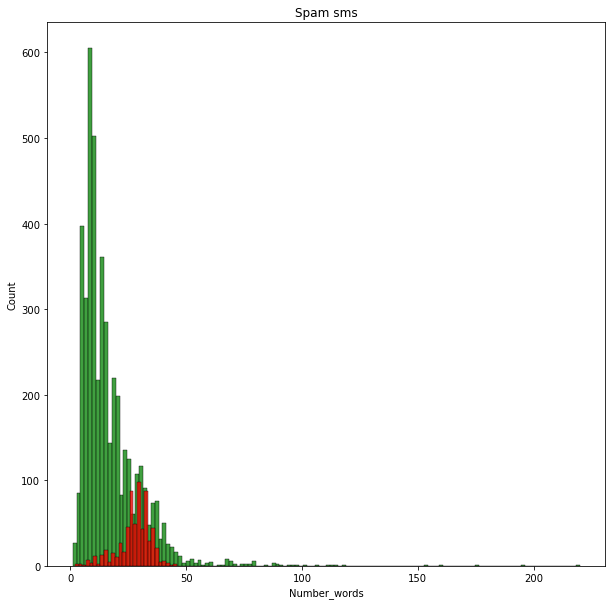

In [417]:

plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]["Number_words"],color="green")
plt.title("Ham sms")
sns.histplot(df[df['class']==1]["Number_words"],color='red')
plt.title("Spam sms")
#this show a trend that number of word are bi higher side for span sms as compared to ham sms 

<Figure size 720x720 with 0 Axes>

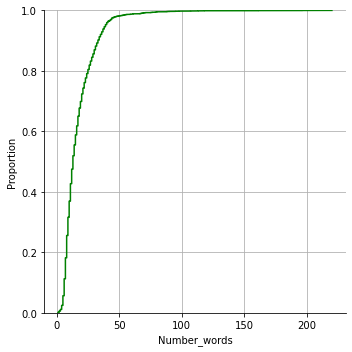

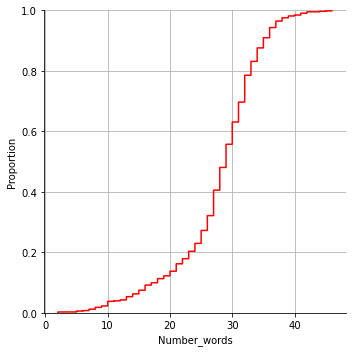

In [422]:
#cumlative plots

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]["Number_words"],color="green",kind='ecdf')
plt.grid()
sns.displot(df[df['class']==1]["Number_words"],color='red',kind='ecdf')
plt.grid()

# Number_sentences

<AxesSubplot:xlabel='Number_sentences', ylabel='Count'>

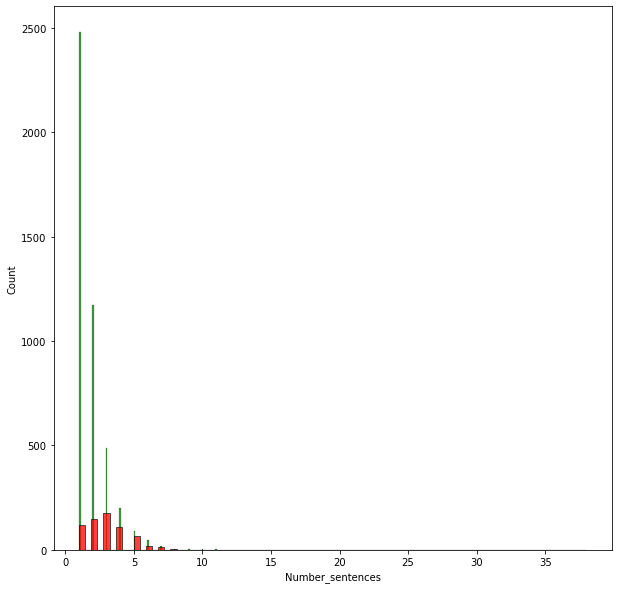

In [393]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]["Number_sentences"],color="green")

sns.histplot(df[df['class']==1]["Number_sentences"],color='red')

#this show a trend that number of sentences are bi higher side for span sms as compared to ham sms 

<Figure size 720x720 with 0 Axes>

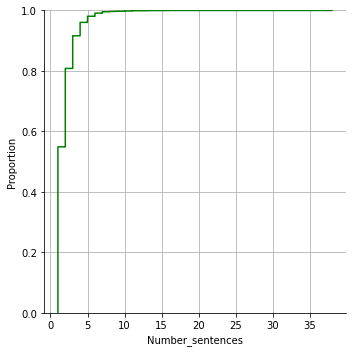

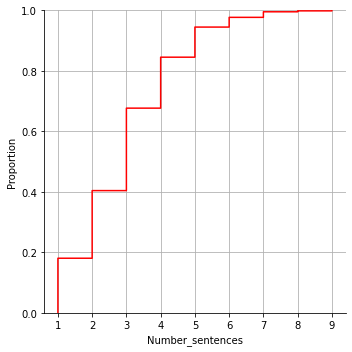

In [423]:

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]["Number_sentences"],color="green",kind="ecdf")
plt.grid()
sns.displot(df[df['class']==1]["Number_sentences"],color='red',kind="ecdf")
plt.grid()

## Kernel Density Estimate Plot

### Number_char and Number_words kde contour

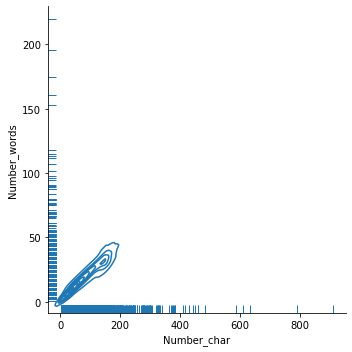

In [395]:
sns.displot(x="Number_char",y="Number_words",data=df,kind="kde",rug=True)

### Number_char vs Number_sentences kde contour

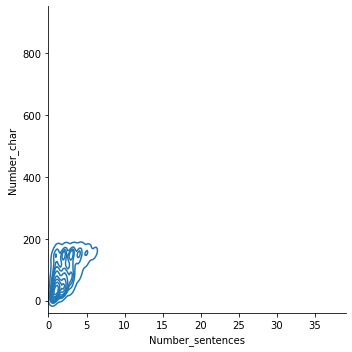

In [396]:
sns.displot(y="Number_char",x="Number_sentences",data=df,kind='kde')

### Number_words vs Number_sentences kde contour

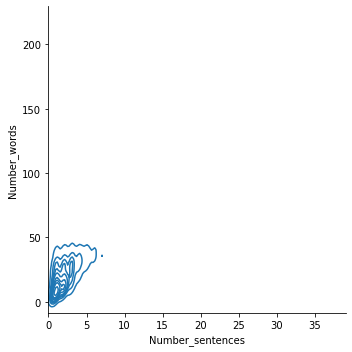

In [398]:
sns.displot(y="Number_words",x="Number_sentences",data=df,kind='kde')

## Pair plot 

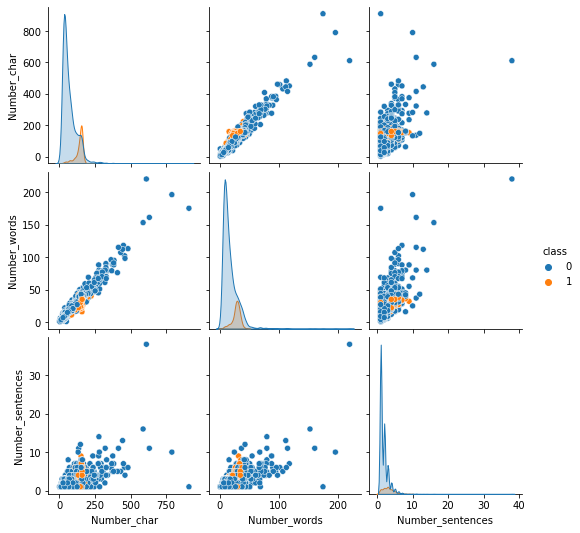

In [399]:
sns.pairplot(df,hue='class')

#The pair plots shows realtions btween the two col of data


# corealtion matrix

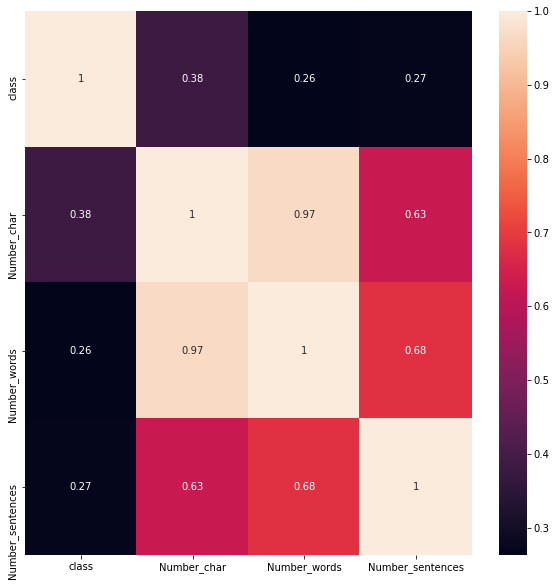

In [400]:
#corealtion Pearson
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()
#conclution from heatmap
#1 higest coeff. is 0.97 btw number of char and number of words . Data has multicolinaerity
#2 we will keep Number_char col for analyis because it has 0.38 corr for the class  

## Data Preprocessing
### Lower case
### Tokenization
### Removing special char
### removing stop words and punctuation
### Stemming


In [401]:
#importing lib for data preprocessing
from nltk.corpus import stopwords #for words in english that help in making sentences
import string  #for punctuations 
from nltk.stem.porter import PorterStemmer #for stemming


In [402]:
#function
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text) #text is converted into list
    mylist=[]
    for ele in text:
        if ele.isalnum():
            mylist.append(ele)
            
    #print(mylist)   
    text=mylist[:]
    mylist.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            mylist.append(i)
            
    ps=PorterStemmer()
    
    text=mylist[:]
    mylist.clear()
    
    for j in text:
        mylist.append(ps.stem(j))
        #for stemming of words
    
            
    return " ".join(mylist)
            


In [403]:
#testing my function 
text_transform("<<<<<<<<<<<<<<< My name is Suraj Saini and my roll number is ME20S031. I like reading books of Machine Learning>>>>>>>>>>>>>>> ")

'name suraj saini roll number me20s031 like read book machin learn'

In [404]:
#Making a new col after data preprocessing
df["text_transform"]=df["sms_text"].apply(text_transform)

<ipython-input-404-f8a16d6a89e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_transform"]=df["sms_text"].apply(text_transform)


# Word cloud

In [405]:
###wordcloud 
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=12,background_color="white")
spam_sms_wc=wc.generate(df[df['class']==1]['text_transform'].str.cat(sep=" "))


### SPAM words

Text(0.5, 1.0, 'SPAM SMS Common words')

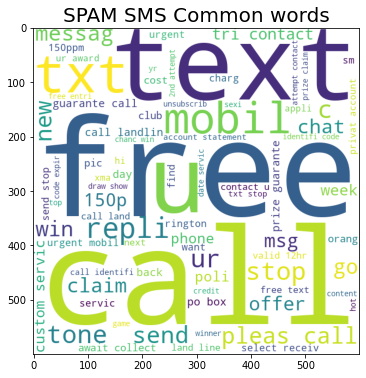

In [406]:
df[df['class']==1]['text_transform']

plt.figure(figsize=(15,6))
plt.imshow(spam_sms_wc)
plt.title("SPAM SMS Common words",fontsize=20)

### HAM words

Text(0.5, 1.0, 'HAM SMS Common words')

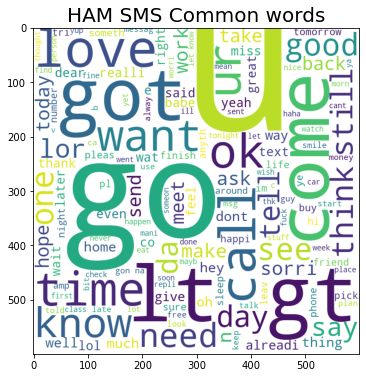

In [407]:
ham_sms_wc=wc.generate(df[df['class']==0]['text_transform'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_sms_wc)
plt.title("HAM SMS Common words",fontsize=20)

### Some top words used in ham and spam sms 

C:\Users\Varun kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


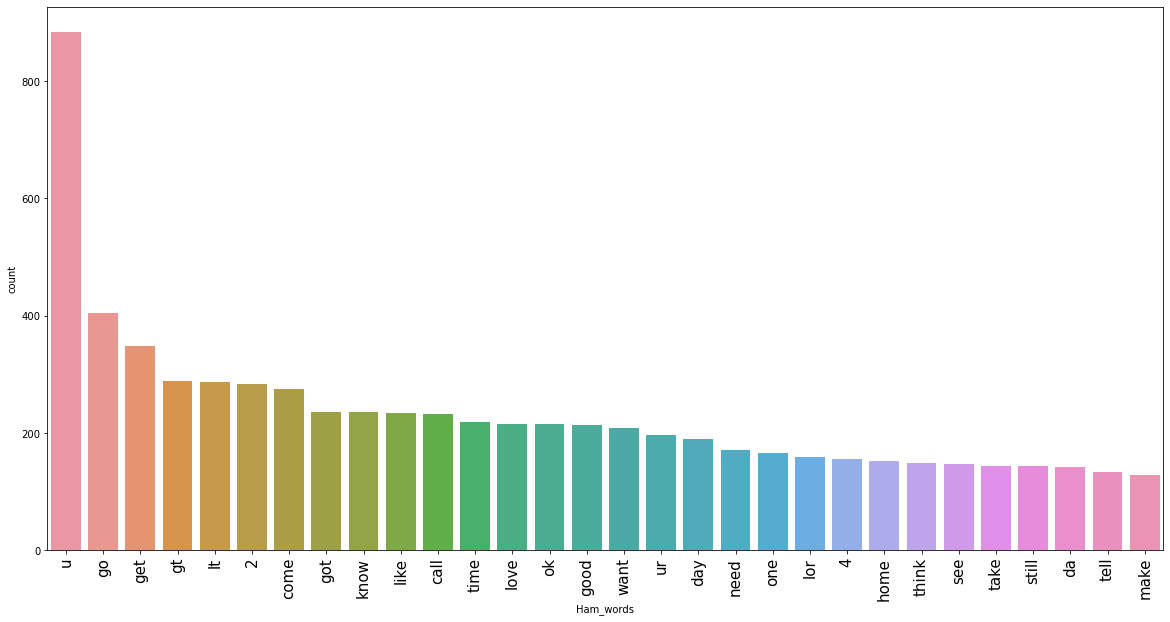

In [408]:
common_ham_ward=list(df[df["class"]==0]["text_transform"])
map_={}
for ele in common_ham_ward:
    for i in ele.split():
        if i not in map_:
            map_[i]=1
        else:
            map_[i]+=1
        
    
ham_df=pd.DataFrame(sorted(map_.items(),key=lambda x:x[1],reverse=True))
ham_df.columns={"Ham_words","count"}

#Plotting
plt.figure(figsize=(20,10))
sns.barplot(ham_df["Ham_words"][:30],ham_df["count"][:30])
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

C:\Users\Varun kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


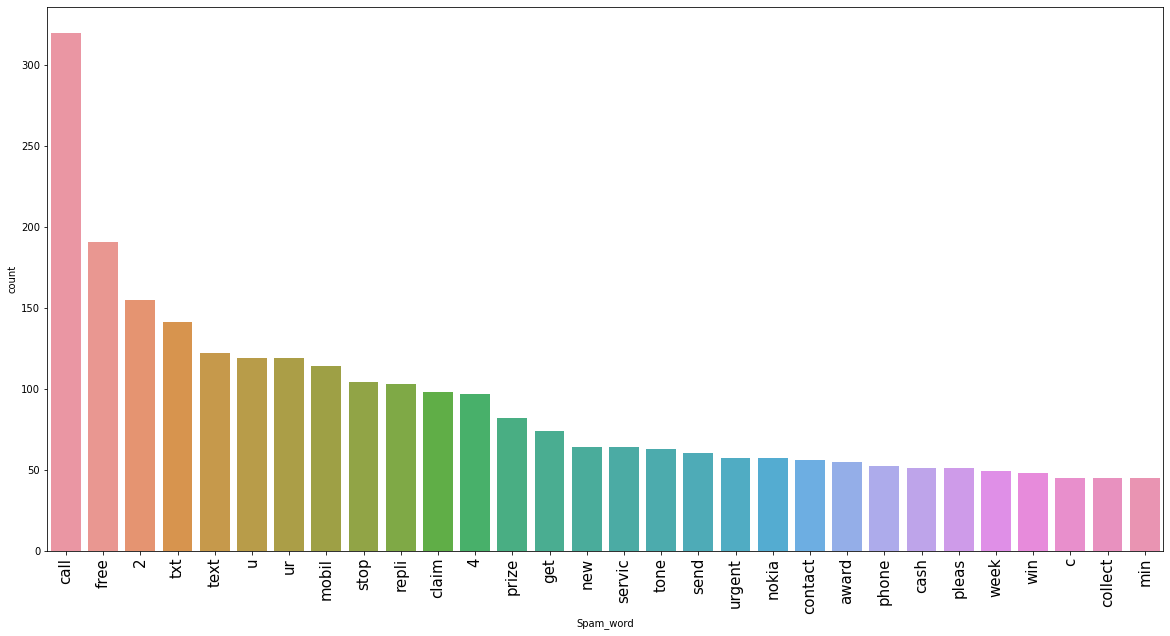

In [409]:

common_spam_word=list(df[df["class"]==1]["text_transform"])
map__={}
for ele in common_spam_word:
    for i in ele.split():
        if i not in map__:
            map__[i]=1
        else:
            map__[i]+=1
            
            
spam_df=pd.DataFrame(pd.DataFrame(sorted(map__.items(),key=lambda x:x[1],reverse=True)))
spam_df.columns={"count","Spam_word"}



#Plotting
plt.figure(figsize=(20,10))
sns.barplot(spam_df["Spam_word"][:30],spam_df["count"][:30])
plt.xticks(rotation='vertical',fontsize=15)
plt.show()


In [410]:

k=set(ham_df["Ham_words"])
j=set(spam_df["Spam_word"])     

In [411]:
comm_words=list(k.intersection(j))
d=pd.DataFrame(comm_words)
d

,0
0,11
1,key
2,del
3,check
4,parti
...,...
871,knock
872,camera
873,villag
874,tour


# Conclustions